# EYE FOR BLIND


In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anjanagogia","key":"dee0b6cd437dd8c9a6e70a0d01b52190"}'}

## Import Data from Kaggle

In [3]:
 ! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#! kaggle competitions download -c 'name-of-competition'
!kaggle datasets download -d adityajn105/flickr8k

 98% 1.02G/1.04G [00:05<00:00, 211MB/s]
100% 1.04G/1.04G [00:06<00:00, 184MB/s]


In [7]:
! mkdir capstone

In [8]:
! unzip flickr8k.zip -d capstone

Streaming output truncated to the last 5000 lines.
  inflating: capstone/Images/2844846111_8c1cbfc75d.jpg  
  inflating: capstone/Images/2844963839_ff09cdb81f.jpg  
  inflating: capstone/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: capstone/Images/2845691057_d4ab89d889.jpg  
  inflating: capstone/Images/2845845721_d0bc113ff7.jpg  
  inflating: capstone/Images/2846037553_1a1de50709.jpg  
  inflating: capstone/Images/2846785268_904c5fcf9f.jpg  
  inflating: capstone/Images/2846843520_b0e6211478.jpg  
  inflating: capstone/Images/2847514745_9a35493023.jpg  
  inflating: capstone/Images/2847615962_c330bded6e.jpg  
  inflating: capstone/Images/2847859796_4d9cb0d31f.jpg  
  inflating: capstone/Images/2848266893_9693c66275.jpg  
  inflating: capstone/Images/2848571082_26454cb981.jpg  
  inflating: capstone/Images/2848895544_6d06210e9d.jpg  
  inflating: capstone/Images/2848977044_446a31d86e.jpg  
  inflating: capstone/Images/2849194983_2968c72832.jpg  
  inflating: capstone/Images/28507194

In [9]:
#Import all the required libraries
import numpy as np
import pandas as pd
import cv2
import os 
from glob import glob

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from glob import glob
import matplotlib .pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import collections
import random
import tensorflow as tf

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create word-to-index and index-to-word mappings.

4.Create a dataframe which summarizes the image, path & captions as a dataframe

5.Visualise the top 30 occuring words in the captions

6.Create a list which contains all the captions & path


In [10]:
#Import the dataset and read the image into a seperate variable
images='/content/capstone/Images'

all_imgs = glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))


The total images present in the dataset: 8091


In [11]:
all_imgs[:5]

['/content/capstone/Images/2084217208_7bd9bc85e5.jpg',
 '/content/capstone/Images/3527926597_45af299eee.jpg',
 '/content/capstone/Images/3256603992_67312b5a36.jpg',
 '/content/capstone/Images/427936315_0b8f7b8d23.jpg',
 '/content/capstone/Images/333031366_a0828c540d.jpg']

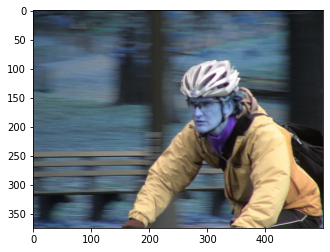

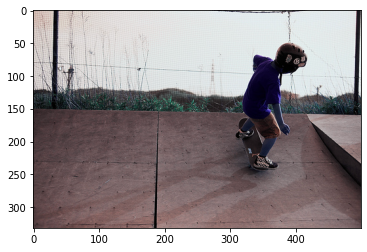

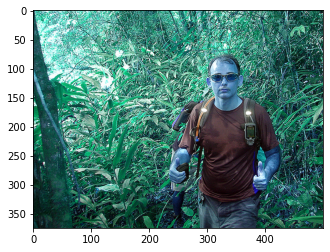

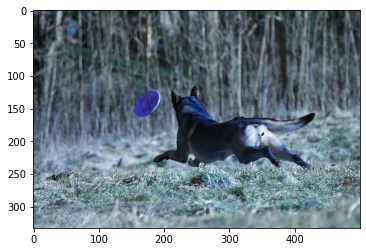

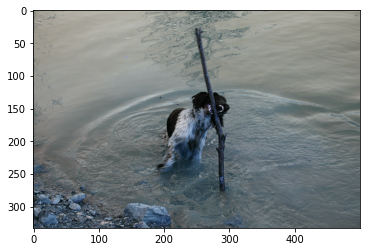

In [12]:
#Visualise both the images & text present in the dataset
for i in range(0,5):
  plt.figure()
  img=cv2.imread(all_imgs[i])
  
  plt.imshow(img)


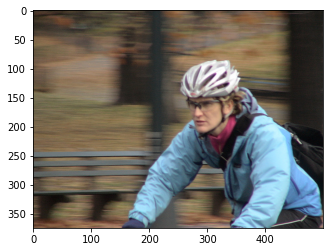

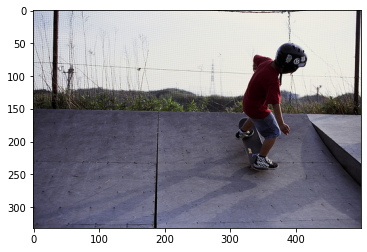

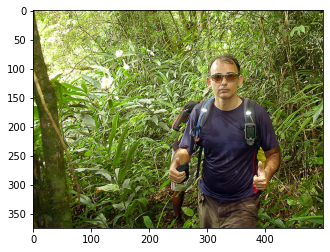

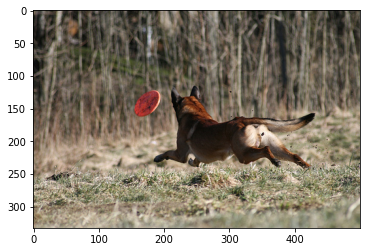

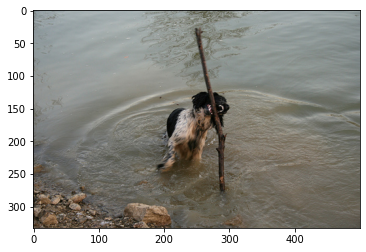

In [13]:
for i in range(0,5):
  plt.figure()
  img=cv2.imread(all_imgs[i])
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)

In [14]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

filename = '/content/capstone/captions.txt'
# load descriptions
doc = load_doc(filename)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [15]:
datatxt = []
for line in doc.split('\n'):
   details=[]
   col = line.split(',')
   if len(col) == 1:
       continue
   #y =  'content'  
   w = col[0].split(' ')
   details.append('/content/capstone/Images')
   details.append(col[0])
   details.append(col[1].lower())   
   datatxt.append(details)

data = pd.DataFrame(datatxt,columns=["Path","ID","Captions"])
data = data.reindex(columns =['ID','Path','Captions'])
data = data[data.ID != 'image']
uni_filenames = np.unique(data.ID.values)

data.head()

ID  ...                                           Captions
1  1000268201_693b08cb0e.jpg  ...  a child in a pink dress is climbing up a set o...
2  1000268201_693b08cb0e.jpg  ...              a girl going into a wooden building .
3  1000268201_693b08cb0e.jpg  ...   a little girl climbing into a wooden playhouse .
4  1000268201_693b08cb0e.jpg  ...  a little girl climbing the stairs to her playh...
5  1000268201_693b08cb0e.jpg  ...  a little girl in a pink dress going into a woo...

[5 rows x 3 columns]

In [16]:
len(data)

40455

In [17]:
data[data.ID=='2856080862_95d793fa9d.jpg']

ID  ...                                           Captions
15646  2856080862_95d793fa9d.jpg  ...  a group of men are standing around during a sp...
15647  2856080862_95d793fa9d.jpg  ...                                  men in the park .
15648  2856080862_95d793fa9d.jpg  ...                      men playing soccer in a field
15649  2856080862_95d793fa9d.jpg  ...  men standing on a grass field with trees in th...
15650  2856080862_95d793fa9d.jpg  ...          "nine men are playing a game in the park 

[5 rows x 3 columns]

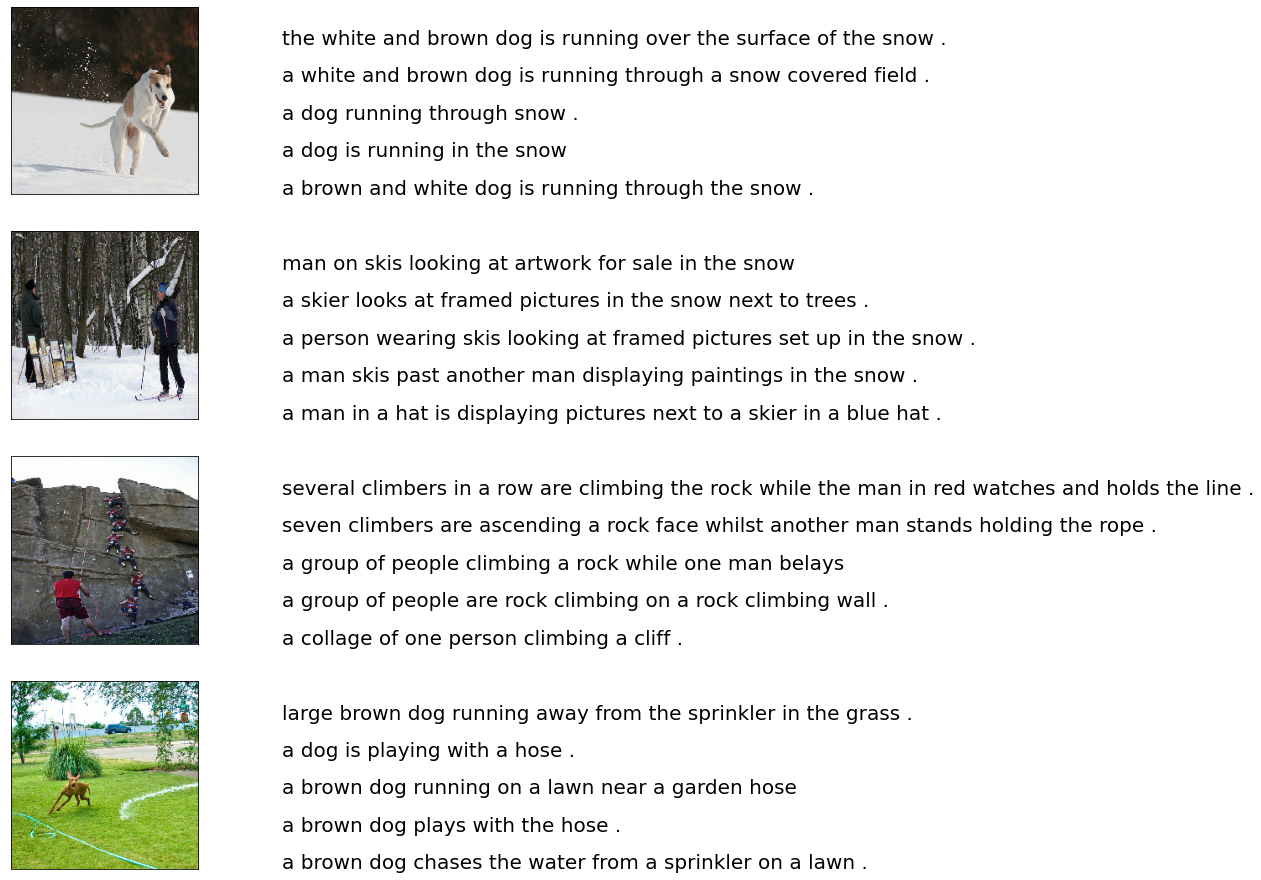

In [18]:
from keras.preprocessing.image import load_img, img_to_array
npic = 5
npix = 224
target_size = (npix,npix,3)
count = 1

img_path= '/content/capstone/Images'

fig = plt.figure(figsize=(10,20))
for jpgfnm in uni_filenames[10:14]:
   filename = img_path + '/' + jpgfnm
   captions = list(data["Captions"].loc[data["ID"]==jpgfnm].values)
   image_load = load_img(filename, target_size=target_size)
   ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
   ax.imshow(image_load)
   count += 1

   ax = fig.add_subplot(npic,2,count)
   plt.axis('off')
   ax.plot()
   ax.set_xlim(0,1)
   ax.set_ylim(0,len(captions))
   for i, caption in enumerate(captions):
       ax.text(0,i,caption,fontsize=20)
   count += 1
plt.show()

In [19]:
#Create the vocabulary & the counter for the captions
from collections import Counter
vocabulary= []
for txt in data.Captions.values:
   vocabulary.extend(txt.split())

val_count=Counter(vocabulary)
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         '.': 34205,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 

In [20]:
print('Vocabulary Size: %d' % len(set(vocabulary)))

Vocabulary Size: 8871


In [21]:
#Visualise the top 30 occuring words in the captions
occurrences = Counter(vocabulary)
top_30_words=list(occurrences.most_common()[:30])
print(top_30_words)

#write your code here

[('a', 60196), ('.', 34205), ('in', 18174), ('the', 17507), ('on', 10357), ('is', 9069), ('and', 8057), ('dog', 7948), ('with', 7304), ('man', 7137), ('of', 6495), ('two', 5132), ('white', 3706), ('black', 3620), ('boy', 3514), ('are', 3365), ('woman', 3304), ('girl', 3277), ('to', 3005), ('wearing', 2916), ('people', 2811), ('at', 2810), ('water', 2676), ('young', 2587), ('red', 2553), ('brown', 2457), ('an', 2325), ('his', 2255), ('blue', 2125), ('dogs', 2095)]


In [22]:
#Create a list which contains all the captions
annotations=[]
#add the <start> & <end> token to all those captions as well
for caption in data.Captions.values:
  caption='<start> ' + caption + ' <end>'
  annotations.append(caption)

#Create a list which contains all the path to the images
all_img_path=[]
PATH='/content/capstone/Images/'
for img in data.ID.values:
  img=PATH+img
  all_img_path.append(img)

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [23]:
annotations[:5]

['<start> a child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> a girl going into a wooden building . <end>',
 '<start> a little girl climbing into a wooden playhouse . <end>',
 '<start> a little girl climbing the stairs to her playhouse . <end>',
 '<start> a little girl in a pink dress going into a wooden cabin . <end>']

In [24]:
all_img_path[:5]

['/content/capstone/Images/1000268201_693b08cb0e.jpg',
 '/content/capstone/Images/1000268201_693b08cb0e.jpg',
 '/content/capstone/Images/1000268201_693b08cb0e.jpg',
 '/content/capstone/Images/1000268201_693b08cb0e.jpg',
 '/content/capstone/Images/1000268201_693b08cb0e.jpg']

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [25]:
# create the tokenizer
tokenizer = Tokenizer(num_words=5000,
                                                 oov_token="<unk>",
                                                 filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(annotations)
print(tokenizer)


In [26]:
# Create word-to-index and index-to-word mappings.
word_index=(tokenizer).word_index
print(word_index)
seqences=tokenizer.texts_to_sequences(annotations)
print(seqences)

{'<unk>': 1, 'a': 2, '<start>': 3, '<end>': 4, 'in': 5, 'the': 6, 'on': 7, 'is': 8, 'and': 9, 'dog': 10, 'with': 11, 'man': 12, 'of': 13, 'two': 14, 'white': 15, 'black': 16, 'boy': 17, 'are': 18, 'woman': 19, 'girl': 20, 'to': 21, 'wearing': 22, 'people': 23, 'at': 24, 'water': 25, 'young': 26, 'red': 27, 'brown': 28, 'an': 29, 'his': 30, 'blue': 31, 'dogs': 32, 'running': 33, 'through': 34, 'playing': 35, 'shirt': 36, 'while': 37, 'down': 38, 'little': 39, 'standing': 40, 'ball': 41, 'grass': 42, 'person': 43, 'child': 44, 'snow': 45, 'jumping': 46, 'over': 47, 'three': 48, 'front': 49, 'sitting': 50, 'small': 51, 'up': 52, 'field': 53, 'holding': 54, 'large': 55, 'group': 56, 'by': 57, 'green': 58, 'yellow': 59, 'children': 60, 'walking': 61, 'men': 62, 'her': 63, 'into': 64, 'beach': 65, 'air': 66, 'near': 67, 'jumps': 68, 'mouth': 69, 'street': 70, 'runs': 71, 'for': 72, 'another': 73, 'riding': 74, 'from': 75, 'its': 76, 'as': 77, 'bike': 78, 'stands': 79, 'girls': 80, 'one': 81,

In [27]:
# Pad each vector to the max_length of the captions ^ store it to a vairable
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(annotations)
cap_vector = pad_sequences(train_seqs, padding='post')


print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 35)


In [28]:
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [29]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(cap_vector)
max_length

35

## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [30]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

## Create the train & test data 
1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [31]:
cap_vector, img_name_vector = shuffle(cap_vector,all_img_path,random_state=1)

img_to_cap_vector = collections.defaultdict(list)
len(img_to_cap_vector)
for img, cap in zip(img_name_vector, cap_vector):
  img_to_cap_vector[img].append(cap)
  
img_keys=list(img_to_cap_vector.keys())
img_name_train_keys, img_name_val_keys = train_test_split(img_keys, test_size=0.2, random_state=42)

img_name_train = []
cap_train = []

for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

In [32]:
len(set(img_name_train)), len(cap_train), len(set(img_name_val)), len(cap_val)

(6472, 32360, 1619, 8095)

In [33]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(32360, 32360, 8095, 8095)

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [34]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87916544/87910968 [==============================] - 1s 0us/step


In [35]:
# write your code to extract features from each image in the dataset
# Get unique images
encode_train = sorted(set(img_name_train))

# Feel free to change batch_size according to your system configuration
train_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
train_dataset = train_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

for img, path in train_dataset:
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())


In [36]:
# write your code to extract features from each image in the dataset
# Get unique images
encode_val = sorted(set(img_name_val))

# Feel free to change batch_size according to your system configuration
val_dataset = tf.data.Dataset.from_tensor_slices(encode_val)
val_dataset = val_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

for img, path in val_dataset:
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

In [37]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  
print(sample_cap_batch.shape)

(16, 299, 299, 3)
(16,)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [38]:
top_k=5000
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = top_k + 1
train_num_steps = len(img_name_train) // BATCH_SIZE
test_num_steps = len(img_name_val) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

In [39]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [40]:
train_dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
train_dataset = train_dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [41]:
val_dataset = tf.data.Dataset.from_tensor_slices((img_name_val, cap_val))

# Use map to load the numpy files in parallel
val_dataset = val_dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
val_dataset = val_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [42]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(256, 64, 2048)
(256, 35)


### Encoder

In [43]:
class Encoder(tf.keras.Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embedding_dim)#build your Dense layer with relu activation
        self.dropout = tf.keras.layers.Dropout(0.5)
        
    def call(self, features):
        features = self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.nn.relu(features)
        return features

In [44]:
encoder=Encoder(embedding_dim)

### Attention model

In [45]:
class Attention(tf.keras.Model):
  def __init__(self, units):
    super(Attention, self).__init__()
    # define all layers in init
    #self.W1 = tf.keras.layers.Dense(units, kernel_regularizer= tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4))
    #self.W2 = tf.keras.layers.Dense(units, kernel_regularizer= tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4))
    self.W1 =tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
     #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
    
    hidden_with_time_axis = tf.expand_dims(hidden, 1) # Expand the hidden shape to shape: (batch_size, 1, hidden_size)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))
    
    
    
    score = self.V(attention_hidden_layer) # build your score funciton to shape: (batch_size, 8*8, units)    
    attention_weights = tf.nn.softmax(score, axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
    context_vector = attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
    context_vector = tf.reduce_sum(context_vector, axis=1) # reduce the shape to (batch_size, embedding_dim)

    return context_vector, attention_weights

### Decoder

In [46]:
class Decoder(tf.keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention =Attention(self.units) #iniitalise your Attention model with units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')        
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        
        self.d2 = tf.keras.layers.Dense(vocab_size)
        self.dropout = tf.keras.layers.Dropout(0.5)
 #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights =self.attention(features, hidden)
 #create your context vector & attention weights from attention model
        x= self.embedding(x)
        x= tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output,state = self.gru(x)

        x = self.d1(output)
        
        x = tf.reshape(x, (-1, x.shape[2])) # shape : (batch_size * max_length, hidden_size)
         
        x = self.d2(x) # shape : (batch_size * max_length, vocab_size)
        
        return x,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [47]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [48]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (256, 64, 256)
Predcitions shape from Decoder: (256, 5001)
Attention weights shape from Decoder: (256, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [49]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [50]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [51]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [52]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [53]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.init_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [54]:
@tf.function
def test_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.init_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

  features = encoder(img_tensor)
  for i in range(1, target.shape[1]):
    # passing the features through the decoder
    predictions, hidden, _ = decoder(dec_input, features, hidden)
    loss += loss_function(target[:, i], predictions)

  avg_loss = (loss /int(target.shape[1]))

  return loss, avg_loss
  

In [55]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (feat_tensor, target)) in enumerate(test_dataset):
      batch_loss, t_loss = test_step(feat_tensor, target)
      total_loss += t_loss
    avg_test_loss=total_loss / test_num_steps

    #write your code to get the average loss result on your test data
    
    return avg_test_loss

In [56]:
import time
loss_plot = []
test_loss_plot = []
EPOCHS = 20

best_test_loss=100

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps   
             
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(val_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

For epoch: 1, the train loss is 1.675, & test loss is 2.360
Time taken for 1 epoch 167.09951329231262 sec

Test loss has been reduced from 100.000 to 2.360
For epoch: 2, the train loss is 1.306, & test loss is 2.457
Time taken for 1 epoch 54.01673126220703 sec

For epoch: 3, the train loss is 1.149, & test loss is 2.713
Time taken for 1 epoch 53.22289848327637 sec

For epoch: 4, the train loss is 1.067, & test loss is 2.883
Time taken for 1 epoch 53.49347376823425 sec

For epoch: 5, the train loss is 1.005, & test loss is 2.833
Time taken for 1 epoch 53.44957613945007 sec

For epoch: 6, the train loss is 0.956, & test loss is 2.864
Time taken for 1 epoch 53.33478260040283 sec

For epoch: 7, the train loss is 0.913, & test loss is 2.867
Time taken for 1 epoch 53.35639524459839 sec

For epoch: 8, the train loss is 0.875, & test loss is 2.905
Time taken for 1 epoch 53.20519208908081 sec

For epoch: 9, the train loss is 0.841, & test loss is 3.000
Time taken for 1 epoch 53.47703671455383 s

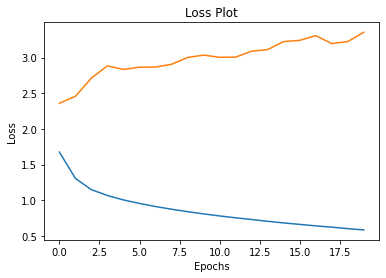

In [57]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [58]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot


### Beam Search(optional)

In [59]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [60]:
from nltk.translate.bleu_score import sentence_bleu

In [61]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 78.7511062110268
Real Caption: a dog looking at the camera in snow
Prediction Caption: a golden dog running through the snow covered field covered in the snow


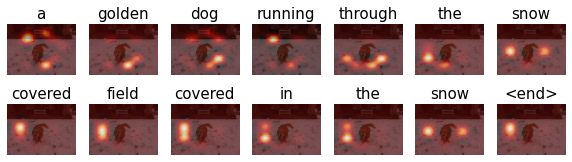

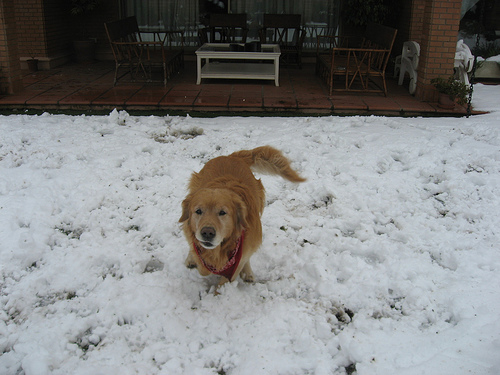

In [66]:
from PIL import Image
rid = np.random.randint(0, len(img_name_val))
#rid = np.random.randint(0, len(img_name_val))
test_image = img_name_val[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate)
print(f"BELU score: {score*100}")

print('Real Caption:',real_caption)
print('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 40.8248290463863
Real Caption: a young child riding on a plastic yellow car
Prediction Caption: children playing a plastic baby while wearing water wings


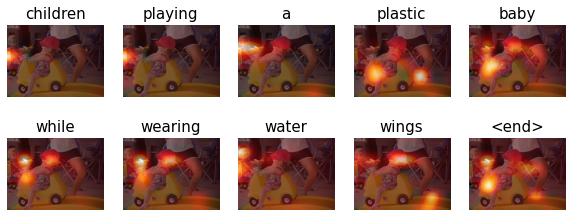

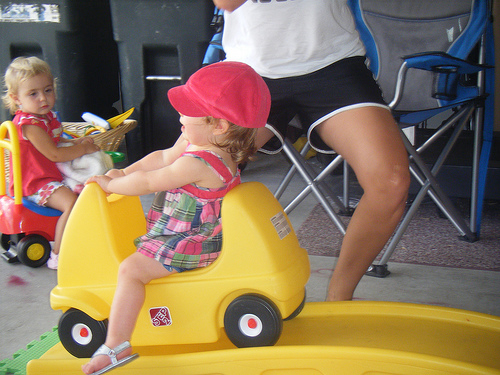

In [72]:
rid = np.random.randint(0, len(img_name_val))
#rid = np.random.randint(0, len(img_name_val))
test_image = img_name_val[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate)
print(f"BELU score: {score*100}")

print('Real Caption:',real_caption)
print('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

## Text To Speech Conversion

In [73]:
pip install gtts

In [74]:
from gtts import gTTS
import os
def text_to_speech(pred_caption,image_name):
  language ='en'
  audio_name=image_name+'.wav'
  audio=gTTS(text=pred_caption,lang=language,slow=False)  
  audio.save(audio_name)
  os.system(audio_name)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 29.05857294915733
Real Caption: a woman in a sari next to a boy holding a red umbrella in a rainy street
Prediction Caption: a man on a street that is marching band in the street with a marching band dressed in a colorful outfit is marching performer with yellow and a marching band while a colorful shirt


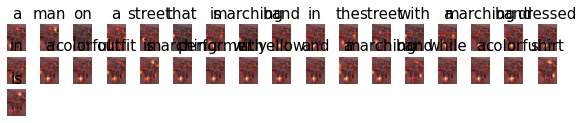

Listen to audio file for predicted caption details: 2734219983_fe86a60bf9.wav


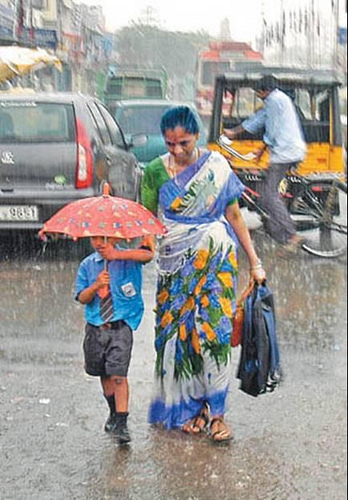

In [75]:
rid = np.random.randint(0, len(img_name_val))

test_image = img_name_val[rid]


real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate)
print(f"BELU score: {score*100}")

print('Real Caption:',real_caption)
print('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)

test_image_list=test_image.split('/')
test_image_name=test_image_list[-1]
print('Listen to audio file for predicted caption details:',test_image_name[:-4]+'.wav')
text_to_speech(pred_caption,test_image_name[:-4])

Image.open(test_image)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 52.47357977607321
Real Caption: a group of people gather outside on the pavement
Prediction Caption: four young people are standing holding their dance


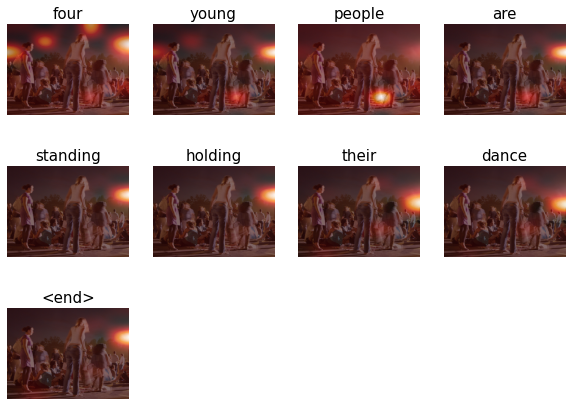

*******************************************************************************************
Listen to audio file for predicted caption details: 3693297007_94512e861e.wav
*******************************************************************************************


In [77]:
rid = np.random.randint(0, len(img_name_val))
#rid = np.random.randint(0, len(img_name_val))
test_image = img_name_val[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate)
print(f"BELU score: {score*100}")

print('Real Caption:',real_caption)
print('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)

test_image_list=test_image.split('/')
test_image_name=test_image_list[-1]
text_to_speech(pred_caption,test_image_name[:-4])

Image.open(test_image)
print('*******************************************************************************************')
print('\033[1m' + 'Listen to audio file for predicted caption details:',test_image_name[:-4]+'.wav' + '\033[0m')
print('*******************************************************************************************')


## Caption Verification on Random Images


Prediction Caption: a small brown and white dog walking in the distance <end>


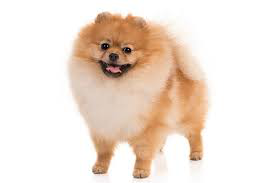

In [81]:
image_path1 = '/content/download1.jpg'
result1, attention_plot = evaluate(image_path1)
print ('Prediction Caption:', ' '.join(result1))
#plot_attention(image_path, attention_plot,result,)
# opening the image
Image.open(image_path1)